In [1]:
!pip install "stable-baselines3[extra]>=2.0.0a4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl.metadata (558 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.9/182.9 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.2 MB/s eta 0:00:00
Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446661 sha256=e3ec7475a7c5e4aa35eda9c18e778efe1bbf952219afa8662a19d5f7ec5d2287
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_atari_env
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3.common.evaluation import evaluate_policy

import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)

In [ ]:
model = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersPpoDefaults_30000000_steps", verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
                 force_reset=False)
model.set_env(vec_env)

Wrapping the env in a VecTransposeImage.


In [ ]:
# Default PPO Agent, after 30M steps of training
ep_reward, ep_len = evaluate_policy(model, vec_env, n_eval_episodes=80, return_episode_rewards=True)

# print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

In [ ]:
print(ep_reward)
print(ep_len)
print(len(ep_len))

NameError: name 'ep_reward' is not defined

Repeat Evaluation for Winning Parameter Settings

In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
envHighScore = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env_high_score = VecFrameStack(envHighScore, n_stack=4)

In [ ]:

model_high_score = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersLvl4Train_29955088_steps", verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
                 force_reset=False)
model_high_score.set_env(vec_env_high_score)

Wrapping the env in a VecTransposeImage.


In [ ]:
# Winning High Score PPO Agent, after ~30M steps of training
mean_reward_hs, std_reward_hs = evaluate_policy(model_high_score, vec_env_high_score, n_eval_episodes=100)

print(f"mean_reward:{mean_reward_hs:.2f} +/- {std_reward_hs:.2f}")

mean_reward:1400.55 +/- 613.95


In [ ]:
# Winning High Score PPO Agent, after ~30M steps of training
ep_reward_hs, ep_len_hs = evaluate_policy(model_high_score, vec_env_high_score, n_eval_episodes=100, return_episode_rewards=True)

# print(f"mean_reward:{mean_reward_hs:.2f} +/- {std_reward_hs:.2f}")

In [ ]:
print(ep_reward_hs)
print(ep_len_hs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'ep_reward_hs' is not defined

Score Best Model (BM)

In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
envBM = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env_bm = VecFrameStack(envBM, n_stack=4)

In [ ]:
modelBm = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersLvl4Train_63955088_steps", verbose=1, tensorboard_log="./gdrive/MyDrive/models/ppo_spaceinvaders_tensorboard/",
                 force_reset=False)
modelBm.set_env(vec_env_bm)

Wrapping the env in a VecTransposeImage.


In [ ]:
n_eval_episodes = 100

In [ ]:
# Highest Scoring PPO Agent, after ~64M steps of training
ep_reward_bm, ep_len_bm = evaluate_policy(modelBm, vec_env_bm, n_eval_episodes=n_eval_episodes, return_episode_rewards=True)

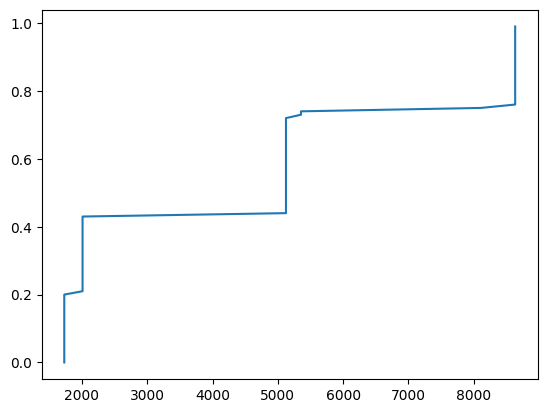

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes
X = np.sort(ep_reward_bm)
F = np.array(range(N))/float(N)

plt.plot(X, F)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

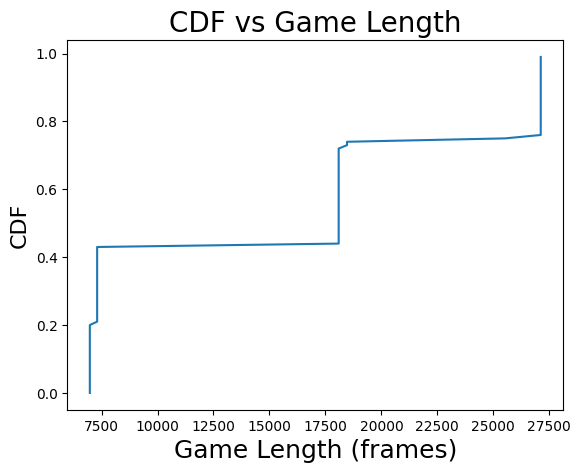

In [ ]:
# CDF Plot of Game Length
N = n_eval_episodes
XL = np.sort(ep_len_bm)
FL = np.array(range(N))/float(N)

plt.plot(XL, FL)
plt.title('CDF vs Game Length', fontsize = 20)
plt.xlabel('Game Length (frames)', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

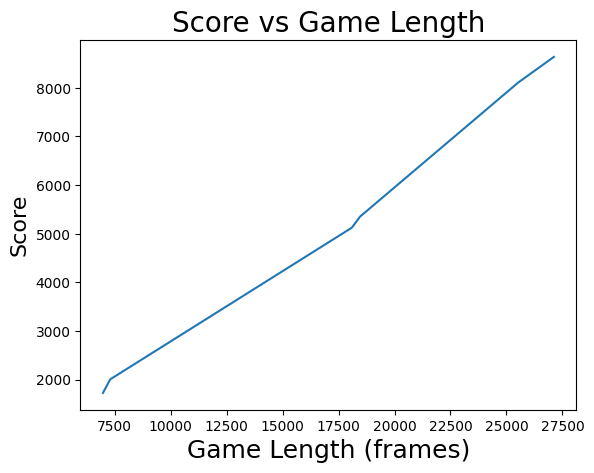

In [ ]:
# Score vs Game Length Plot
plt.plot(XL, X)
plt.title('Score vs Game Length', fontsize = 20)
plt.xlabel('Game Length (frames)', fontsize = 18)
plt.ylabel('Score', fontsize = 16)
plt.show()

In [ ]:
# There already exists an environment generator that will make and wrap atari environments correctly.
env = make_atari_env("SpaceInvadersNoFrameskip-v4", n_envs=8, seed=0)
# Stack 4 frames
vec_env = VecFrameStack(env, n_stack=4)


model = PPO.load("/content/gdrive/MyDrive/models/PPO/ppo_spaceInvadersLvl4Train_63955088_steps",
                 verbose=1,
                 force_reset=False)

In [ ]:
from stable_baselines3.common.callbacks import ProgressBarCallback

ep_reward, ep_len = evaluate_policy(model, vec_env, n_eval_episodes=1000, return_episode_rewards=True, deterministic=False)

from google.colab import drive
import pickle

f_out = open('ep_reward.pkl', 'wb')
pickle.dump(ep_reward, f_out)
f_out.close()

f_out = open('ep_len.pkl', 'wb')
pickle.dump(ep_len, f_out)
f_out.close()


# copy it there
!cp ep_reward.pkl ./gdrive/MyDrive/models/evalPPO/ep_reward_1000_detFalse.pkl
!cp ep_len.pkl ./gdrive/MyDrive/models/evalPPO/ep_len_1000_detFalse.pkl

In [ ]:
from google.colab import drive
import pickle

f_out = open('ep_reward.pkl', 'wb')
pickle.dump(ep_reward, f_out)
f_out.close()

f_out = open('ep_len.pkl', 'wb')
pickle.dump(ep_len, f_out)
f_out.close()


# copy it there
!cp ep_reward.pkl ./gdrive/MyDrive/models/evalPPO/ep_reward_1000.pkl
!cp ep_len.pkl ./gdrive/MyDrive/models/evalPPO/ep_len_1000.pkl



In [ ]:
pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_reward.pkl', 'rb')
# pkl_file = open('ep_reward.pkl', 'rb')
ep_reward_disk = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_len.pkl', 'rb')
# pkl_file = open('ep_len.pkl', 'rb')
ep_len_disk = pickle.load(pkl_file)
pkl_file.close()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"\npkl_file = open('ep_len.pkl', 'rb')\nep_len_disk = pickle.load(pkl_file)\npkl_file.close()\n"

In [12]:
import pickle

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_reward_1000_detFalse.pkl', 'rb')
# pkl_file = open('ep_reward.pkl', 'rb')
ep_reward_disk = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_len_1000_detFalse.pkl', 'rb')
# pkl_file = open('ep_len.pkl', 'rb')
ep_len_disk = pickle.load(pkl_file)
pkl_file.close()

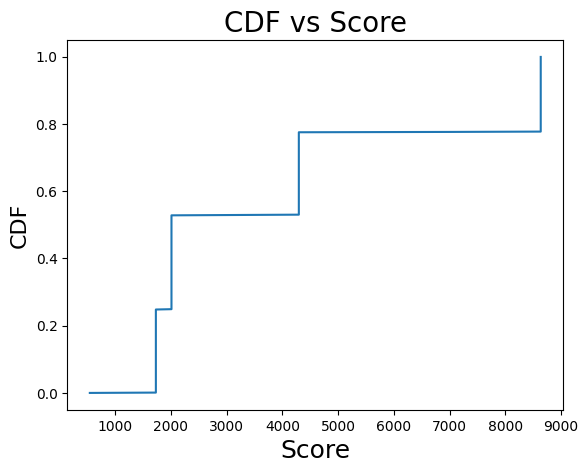

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes = 1000
X = np.sort(ep_reward)
F = np.array(range(N))/float(N)

plt.plot(X, F)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

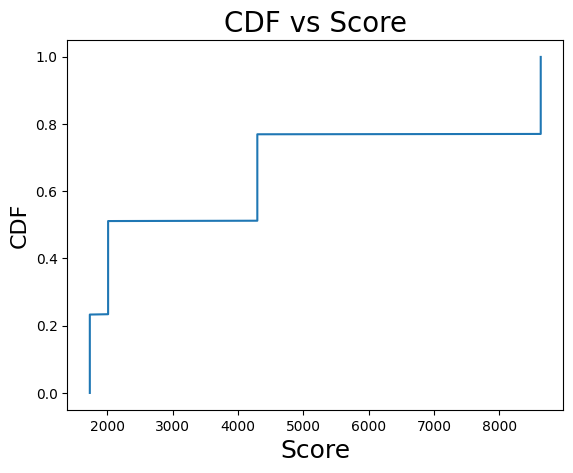

In [ ]:
# CDF Plot of Scores
N = n_eval_episodes = 1000
X = np.sort(ep_reward)
F = np.array(range(N))/float(N)

plt.plot(X, F)
plt.title('CDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('CDF', fontsize = 16)
plt.show()

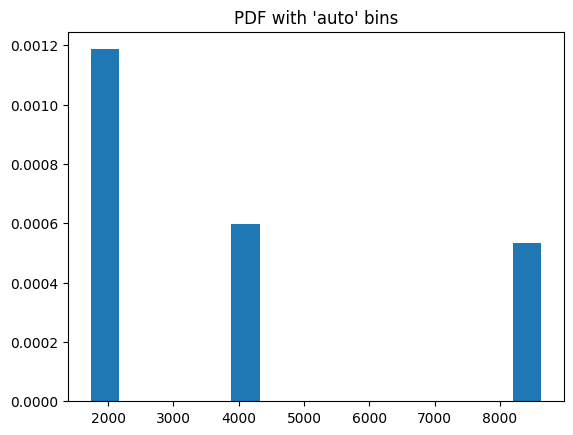

"\nep_reward = ep_reward_disk\n\nN = n_eval_episodes = 1000\nX = np.sort(ep_reward)\nF = np.array(range(N))/float(N)\n\nplt.plot(X, F)\nplt.title('PDF vs Score', fontsize = 20)\nplt.xlabel('Score', fontsize = 18)\nplt.ylabel('PDF', fontsize = 16)\nplt.show()\n"

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

#ep_reward = ep_reward_disk

# cdf = np.cumsum(histo[0])
# normCdf = cdf/np.amax(cdf)
# histo = numpy.histogram(arr, nbins)
histo = np.histogram(ep_reward, bins='auto')

plt.hist(ep_reward, bins='auto', density=True)  # arguments are passed to np.histogram
plt.title("PDF with 'auto' bins")
plt.show()
# histo[0]
'''
ep_reward = ep_reward_disk

N = n_eval_episodes = 1000
X = np.sort(ep_reward)
F = np.array(range(N))/float(N)

plt.plot(X, F)
plt.title('PDF vs Score', fontsize = 20)
plt.xlabel('Score', fontsize = 18)
plt.ylabel('PDF', fontsize = 16)
plt.show()
'''

In [ ]:
print("ep reward statistics")
print("min: ", min(ep_reward))
print("max: ", max(ep_reward))
print("mean: ", np.mean(ep_reward))
print("median: ", np.median(ep_reward))
print("std: ", np.std(ep_reward))
stddev = np.std(ep_reward)
print("std dev between max and min: ", (max(ep_reward)-min(ep_reward))/stddev)
print("std dev between mean and median: ", abs((np.mean(ep_reward)-np.median(ep_reward))/stddev))

ep reward statistics
min:  545.0
max:  8635.0
mean:  3984.605
median:  2010.0
std:  2687.1111195808408
std dev between max and min:  3.0106682008974563
std dev between mean and median:  0.7348430757519311


In [ ]:
print("ep reward statistics")
print("min: ", min(ep_reward))
print("max: ", max(ep_reward))
print("mean: ", np.mean(ep_reward))
print("median: ", np.median(ep_reward))
print("std: ", np.std(ep_reward))
stddev = np.std(ep_reward)
print("std dev between max and min: ", (max(ep_reward)-min(ep_reward))/stddev)
print("std dev between mean and median: ", abs((np.mean(ep_reward)-np.median(ep_reward))/stddev))

ep reward statistics
min:  2852
max:  27117
mean:  13157.604
median:  7304.0
std:  7921.436695397118
std dev between max and min:  3.0632069576595344
std dev between mean and median:  0.7389573665849445


In [ ]:
print(2852/545.0)
print(27117/8635.0)

5.23302752293578
3.1403590040532716


In [ ]:
import pickle

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_reward_1000_detFalse.pkl', 'rb')
# pkl_file = open('ep_reward.pkl', 'rb')
ep_reward_disk = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('./gdrive/MyDrive/models/evalPPO/ep_len_1000_detFalse.pkl', 'rb')
# pkl_file = open('ep_len.pkl', 'rb')
ep_len_disk = pickle.load(pkl_file)
pkl_file.close()

In [ ]:
import numpy as np

# np.is_sorted(ep_reward_disk)
print(np.all(np.diff(ep_reward_disk) >= 0))

sorted_rew = np.sort(ep_reward_disk)
print(np.all(np.diff(sorted_rew) >= 0))

diff_rew = np.diff(sorted_rew)

# ep_len_disk


False
True


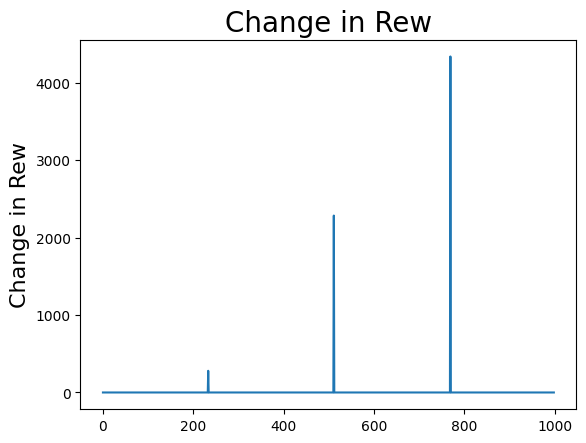

In [ ]:
import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = 1000
X = np.diff(np.sort(ep_reward_disk))
F = np.array(range(N))/float(N)

plt.plot(X)
plt.title('Change in Rew', fontsize = 20)
# plt.xlabel('Change in Rew', fontsize = 18)
plt.ylabel('Change in Rew', fontsize = 16)
plt.show()

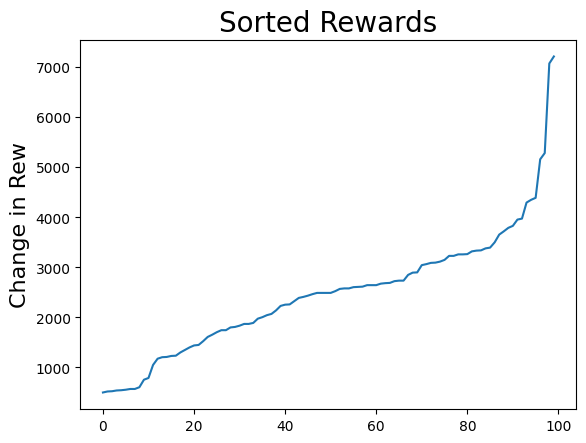

In [ ]:
import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = 100
X = np.sort(ep_reward_disk)
F = np.array(range(N))

plt.plot(F, X)
plt.title('Sorted Rewards', fontsize = 20)
# plt.xlabel('Change in Rew', fontsize = 18)
plt.ylabel('Change in Rew', fontsize = 16)
plt.show()

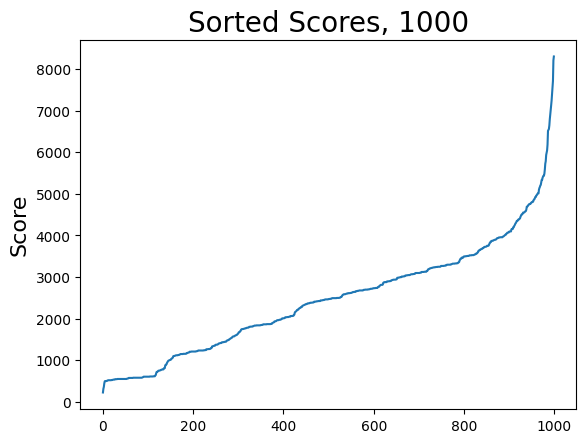

In [ ]:
import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = 1000
X = np.sort(ep_reward_disk)
F = np.array(range(N))

plt.plot(F, X)
plt.title('Sorted Scores, 1000', fontsize = 20)
# plt.xlabel('Change in Rew', fontsize = 18)
plt.ylabel('Score', fontsize = 16)
plt.show()

In [ ]:
ep_reward = ep_reward_disk

print("ep reward statistics")
print("min: ", min(ep_reward))
print("max: ", max(ep_reward))
print("mean: ", np.mean(ep_reward))
print("median: ", np.median(ep_reward))
print("std: ", np.std(ep_reward))
stddev = np.std(ep_reward)
print("std dev between max and min: ", (max(ep_reward)-min(ep_reward))/stddev)
print("std dev between mean and median: ", abs((np.mean(ep_reward)-np.median(ep_reward))/stddev))

ep reward statistics
min:  220.0
max:  8305.0
mean:  2463.975
median:  2465.0
std:  1351.571964186517
std dev between max and min:  5.9819234300751365
std dev between mean and median:  0.0007583761924338354


False
999
465


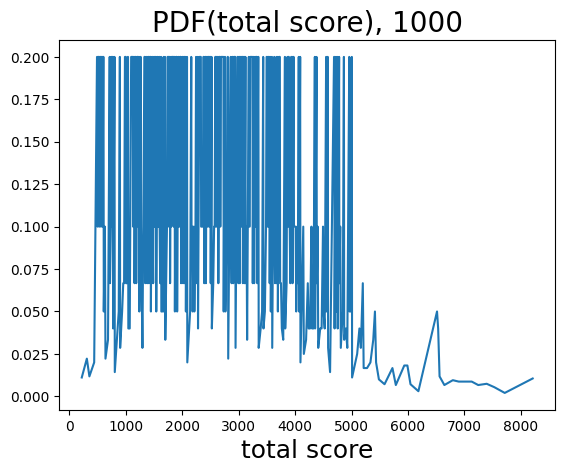

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = 1000
X = np.sort(ep_reward_disk)[:-1]
diffMask = np.diff(np.sort(ep_reward_disk)) != 0
# print(np.sort(ep_reward_disk))
F = (np.diff(np.sort(ep_reward_disk)))
print(np.any(np.isinf(F)))
print(len(F))
print(len(F[diffMask]))

plt.plot(X[diffMask], 1/F[diffMask])
plt.title('PDF(total score), 1000', fontsize = 20)
plt.xlabel('total score', fontsize = 18)
# plt.ylabel('pdf', fontsize = 16)
plt.show()

False
999
465
465


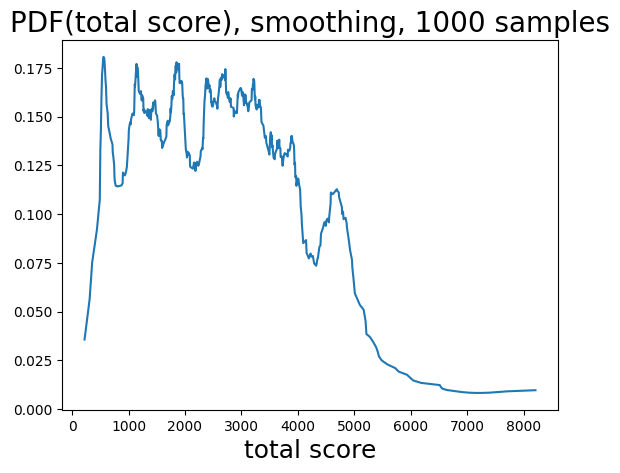

In [26]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt

# Diff of Rewards
N = n_eval_episodes = 1000
X = np.sort(ep_reward_disk)[:-1]
diffMask = np.diff(np.sort(ep_reward_disk)) != 0
# print(np.sort(ep_reward_disk))
F = (np.diff(np.sort(ep_reward_disk)))
y = 1/F[diffMask]
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3
print(np.any(np.isinf(F)))
print(len(F))
print(len(F[diffMask]))
print(len(yhat))

plt.plot(X[diffMask], yhat)
plt.title('PDF(total score), smoothing, 1000 samples', fontsize = 20)
plt.xlabel('total score', fontsize = 18)
# plt.ylabel('pdf', fontsize = 16)
plt.show()


In [ ]:
for rew in np.sort(ep_reward_disk):
  print(rew)

500.0
520.0
525.0
540.0
545.0
555.0
570.0
570.0
605.0
755.0
790.0
1050.0
1175.0
1205.0
1210.0
1230.0
1235.0
1300.0
1350.0
1400.0
1440.0
1450.0
1525.0
1610.0
1655.0
1705.0
1745.0
1745.0
1800.0
1810.0
1835.0
1870.0
1870.0
1890.0
1975.0
2005.0
2045.0
2070.0
2140.0
2230.0
2255.0
2260.0
2325.0
2390.0
2410.0
2435.0
2465.0
2490.0
2490.0
2490.0
2490.0
2525.0
2570.0
2580.0
2580.0
2605.0
2610.0
2615.0
2645.0
2645.0
2645.0
2675.0
2685.0
2690.0
2725.0
2735.0
2735.0
2850.0
2895.0
2900.0
3045.0
3065.0
3090.0
3095.0
3115.0
3150.0
3230.0
3230.0
3260.0
3260.0
3265.0
3320.0
3335.0
3340.0
3380.0
3395.0
3500.0
3655.0
3720.0
3790.0
3830.0
3955.0
3975.0
4295.0
4350.0
4390.0
5160.0
5285.0
7075.0
7215.0
